Calculando o Score de Crédito

In [1]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split # Utilizado para separar dados de treino e teste
from sklearn.preprocessing import StandardScaler # Utilizado para fazer a normalização dos dados
from sklearn.preprocessing import MinMaxScaler # Utilizado para fazer a normalização dos dados
from sklearn.preprocessing import LabelEncoder # Utilizado para fazer o OneHotEncoding
from sklearn.linear_model import LinearRegression # Algoritmo de Regressão Linear
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo
# Comando para exibir todas colunas do arquivo
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Carregando a base de dados
dados = pd.read_excel("/content/dados_credito.xlsx")

In [6]:
# Observando a base de dados
dados.head()

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
0,SP,19,Superior Cursando,Solteiro,0,Não,0,0,Não,0,8,Sim,1800,0,0,12.000000
1,MG,23,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800,1,50000,18.000000
2,SC,25,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23.000000
3,PR,27,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,28.666667
4,RJ,28,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,NaN,1,35000,34.166667


In [3]:
# Observando o tamanho de linhas e colunas
dados.shape

(10476, 17)

In [4]:
# Observando informações
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CODIGO_CLIENTE              10476 non-null  int64  
 1   UF                          10476 non-null  object 
 2   IDADE                       10476 non-null  int64  
 3   ESCOLARIDADE                10476 non-null  object 
 4   ESTADO_CIVIL                10476 non-null  object 
 5   QT_FILHOS                   10476 non-null  int64  
 6   CASA_PROPRIA                10476 non-null  object 
 7   QT_IMOVEIS                  10476 non-null  int64  
 8   VL_IMOVEIS                  10476 non-null  int64  
 9   OUTRA_RENDA                 10476 non-null  object 
 10  OUTRA_RENDA_VALOR           10476 non-null  int64  
 11  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 12  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 13  ULTIMO_SALARIO              104

In [5]:
# Excluindo a variável 'código_cliente'
dados.drop('CODIGO_CLIENTE', axis=1, inplace=True)

In [7]:
# Agrupando os valores para identificar se há algum valor discrepante
dados.groupby(['ULTIMO_SALARIO']).size()

ULTIMO_SALARIO
1800         846
2200         792
3100         792
3900         792
4500         468
4800         792
5300         522
6100         522
6800         611
9000         522
9800         468
11500        790
13000        522
15000        522
17500        522
18300        522
22000        468
SEM DADOS      1
dtype: int64

In [8]:
dados.loc[dados['ULTIMO_SALARIO'] == 'SEM DADOS']

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
10459,RJ,45,Superior Cursando,Solteiro,1,Sim,1,185000,Sim,3000,19,Sim,SEM DADOS,0,0,45.166667


In [10]:
# Agora substituimos a palavra SEM DADOS por um valor NULO
dados.replace('SEM DADOS',np.nan, inplace = True)

In [11]:
# Em seguida convertemos o campo em float
dados['ULTIMO_SALARIO'] = dados['ULTIMO_SALARIO'].astype(np.float64)

In [12]:
# Observando valores nulos
dados.isnull().sum()

UF                            0
IDADE                         0
ESCOLARIDADE                  0
ESTADO_CIVIL                  0
QT_FILHOS                     0
CASA_PROPRIA                  0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA                   0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
TRABALHANDO_ATUALMENTE        0
ULTIMO_SALARIO                3
QT_CARROS                     0
VALOR_TABELA_CARROS           0
SCORE                         0
dtype: int64

In [13]:
# Substituindo os valores nulos pela mediana
dados['ULTIMO_SALARIO'] = dados['ULTIMO_SALARIO'].fillna((dados['ULTIMO_SALARIO'].median()))

In [14]:
# Vamos confirmar se não restaram valores nulos
dados.isnull().sum()

UF                            0
IDADE                         0
ESCOLARIDADE                  0
ESTADO_CIVIL                  0
QT_FILHOS                     0
CASA_PROPRIA                  0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA                   0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
TRABALHANDO_ATUALMENTE        0
ULTIMO_SALARIO                0
QT_CARROS                     0
VALOR_TABELA_CARROS           0
SCORE                         0
dtype: int64

In [15]:
# Observando informações estatísticas
dados.describe()

,IDADE,QT_FILHOS,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
count,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000
mean,41.054124,1.122566,0.847079,238453.608247,641.237113,43.070447,8286.531119,0.936426,40996.563574,51.058706
std,13.878162,1.113537,0.957374,265843.934416,1295.978195,40.851521,5826.589775,0.806635,47404.214062,27.306340
min,19.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1800.000000,0.000000,0.000000,12.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,14.000000,3900.000000,0.000000,0.000000,28.666667
50%,42.000000,1.000000,1.000000,185000.000000,0.000000,22.000000,6100.000000,1.000000,35000.000000,45.166667
75%,53.000000,2.000000,1.000000,370000.000000,0.000000,75.000000,11500.000000,2.000000,50000.000000,72.666667
max,65.000000,42.000000,3.000000,900000.000000,4000.000000,150.000000,22000.000000,2.000000,180000.000000,98.000000


In [16]:
# Agora iremos avaliar os outliers das colunas que são númericas
# Vamos carregar em uma lista as variaveis que são do tipo INT64 E FLOAT64
variaveis_numericas = [] # Define uma lista vazia
for i in dados.columns[0:16].tolist(): # Pega todas as colunas e transforma em uma lista
        if dados.dtypes[i] == 'int64' or dados.dtypes[i] == 'float64': # se a coluna for do tipo int64 e float64
            print(i, ':' , dados.dtypes[i]) # vai exibir nesta linha
            variaveis_numericas.append(i) # vai adicionar na lista de variáveis_numericas

IDADE : int64
QT_FILHOS : int64
QT_IMOVEIS : int64
VL_IMOVEIS : int64
OUTRA_RENDA_VALOR : int64
TEMPO_ULTIMO_EMPREGO_MESES : int64
ULTIMO_SALARIO : float64
QT_CARROS : int64
VALOR_TABELA_CARROS : int64
SCORE : float64


In [17]:
# Observando a lista de variáveis numéricas
variaveis_numericas

['IDADE',
 'QT_FILHOS',
 'QT_IMOVEIS',
 'VL_IMOVEIS',
 'OUTRA_RENDA_VALOR',
 'TEMPO_ULTIMO_EMPREGO_MESES',
 'ULTIMO_SALARIO',
 'QT_CARROS',
 'VALOR_TABELA_CARROS',
 'SCORE']

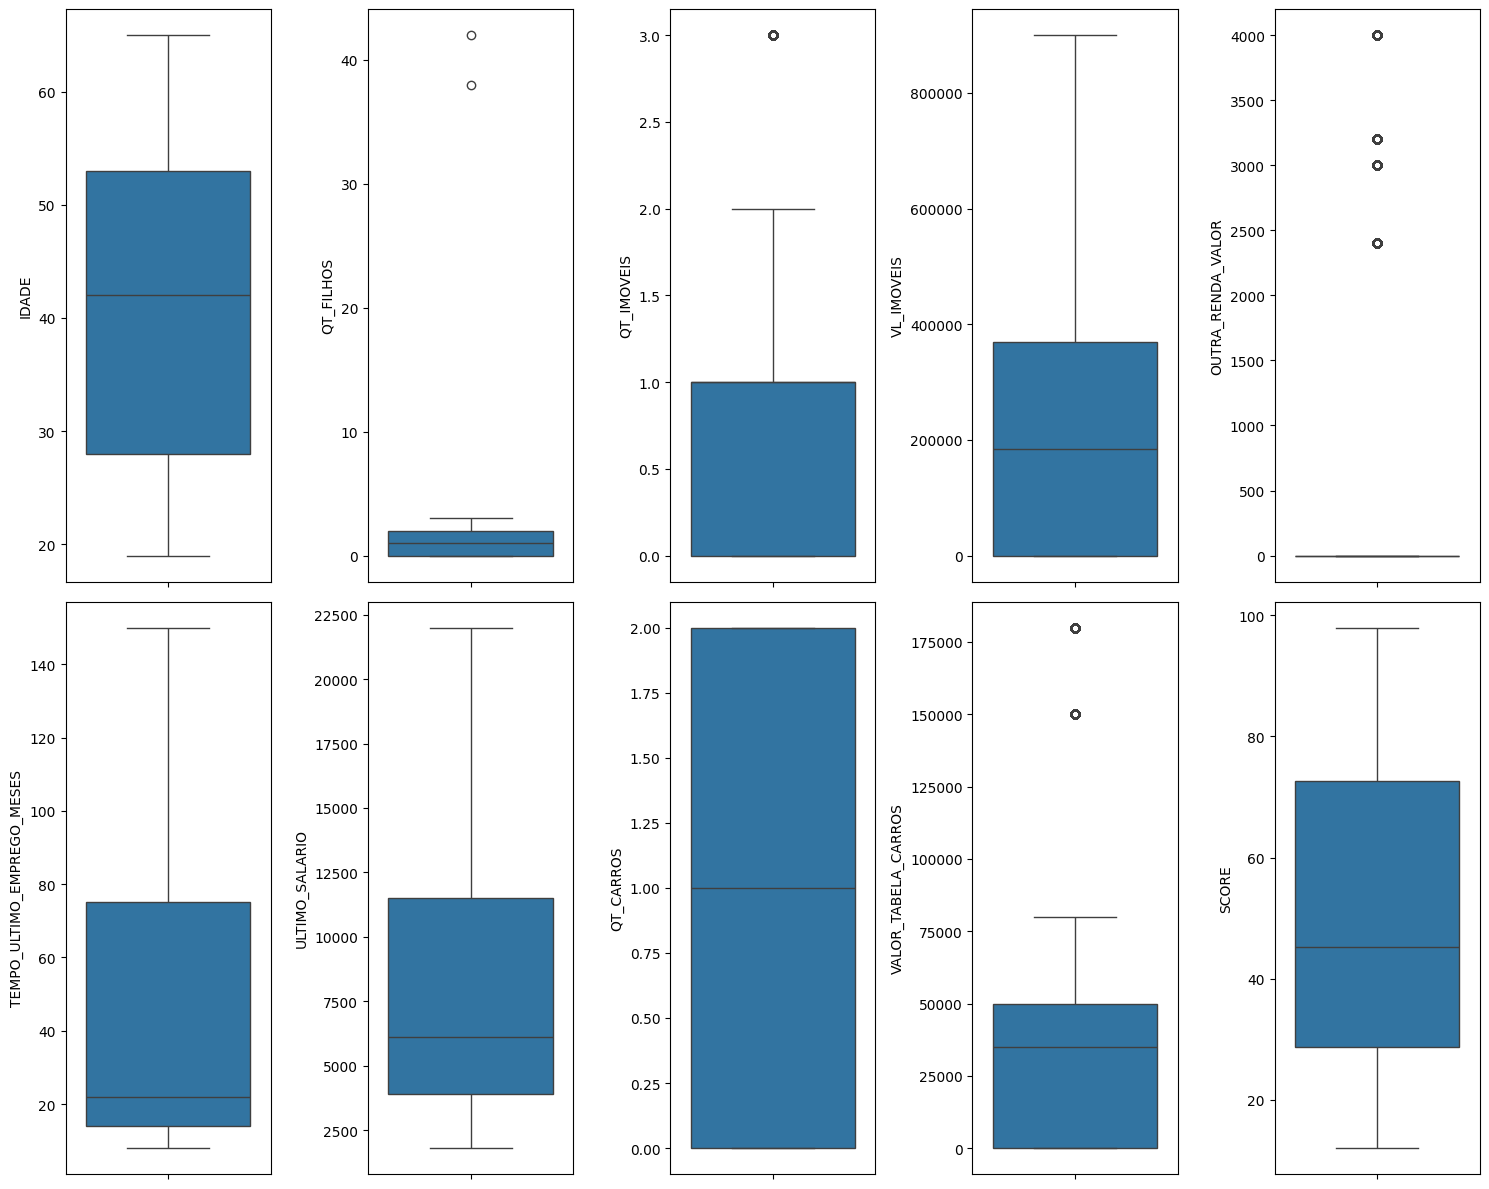

In [18]:
# Aqui definimos o tamanho da tela para exibição dos gráficos
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(2, 5) # 2 linhas e 5 colunas
# linha e coluna igual a 0 pois terá um contador i
linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data = dados, y=i, ax=axes[linha][coluna]) # nos eixos linha e coluna
    coluna += 1
    if coluna == 5: # toda vez que a coluna chega em 5 ele passa para a linha de baixo e soma 1 e zera a coluna
        linha += 1
        coluna = 0

plt.show()

In [19]:
# Variável outlier com quantidade de filhos maior do que 4
dados.loc[dados['QT_FILHOS'] > 4]

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
27,SP,48,Superior Completo,Divorciado,38,Sim,2,600000,Não,0,15,Sim,15000.0,1,70000,67.166667
10455,SP,45,Segundo Grau Completo,Casado,42,Sim,1,220000,Não,0,18,Sim,2200.0,2,30000,23.000000


In [20]:
# Nesse exemplo vamos excluir o registro todo.
dados.drop(dados.loc[dados['QT_FILHOS'] > 4].index, inplace=True)

In [21]:
# Vamos ver o exemplo de oulier na variável outra_renda_valor
# Percebemos que não precisa alterar nada
dados.groupby(['OUTRA_RENDA_VALOR']).size()

OUTRA_RENDA_VALOR
0       8350
2400     468
3000     612
3200     522
4000     522
dtype: int64

In [22]:
# Aqui também não precisamos alterar nada
dados.groupby(['VALOR_TABELA_CARROS']).size()

VALOR_TABELA_CARROS
0         3762
28000      468
30000      791
35000      792
40000      792
48000      522
50000     1314
70000      521
80000      522
150000     468
180000     522
dtype: int64

In [23]:
# Não precisamos alterar nada
dados.groupby(['QT_IMOVEIS']).size()

QT_IMOVEIS
0    4680
1    3761
2     989
3    1044
dtype: int64

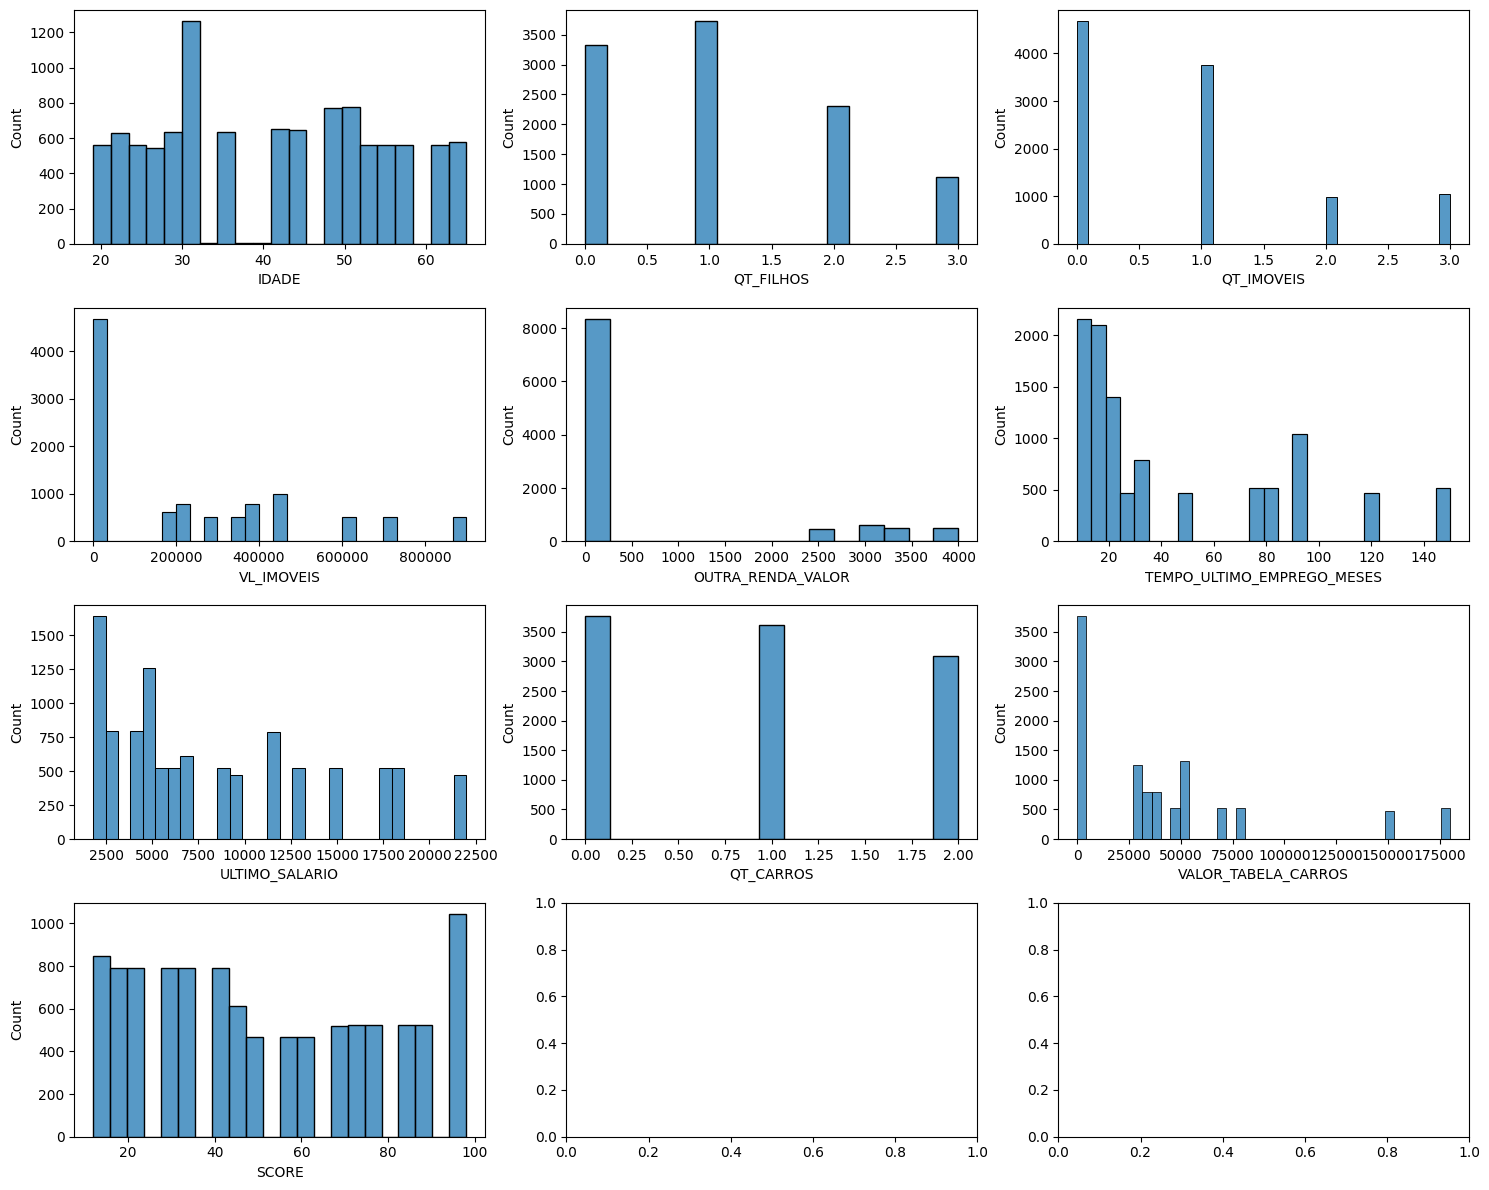

In [24]:
# Vamos gerar um gráfico de histograma para avaliar a distribuição dos dados
# Podemos observar que neste caso os dados estão bem dispersos
# Aqui definimos o tamanho da tela para exibição dos gráficos
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(4, 3) #4 linhas e 3 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.histplot(data = dados, x=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0

plt.show()

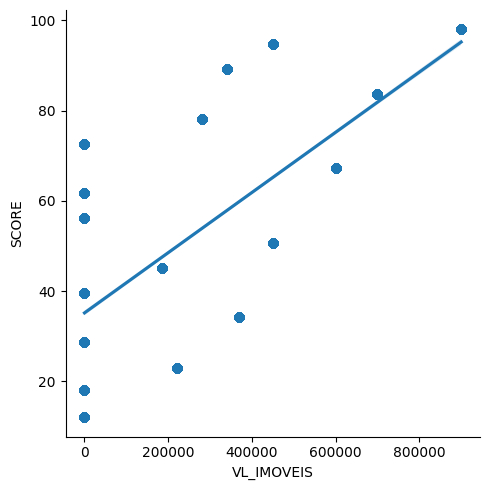

In [25]:
# Vamos observar um grafico de dispersão para avaliar a correlação de algumas variaveis
sns.lmplot(x = "VL_IMOVEIS", y = "SCORE", data = dados);

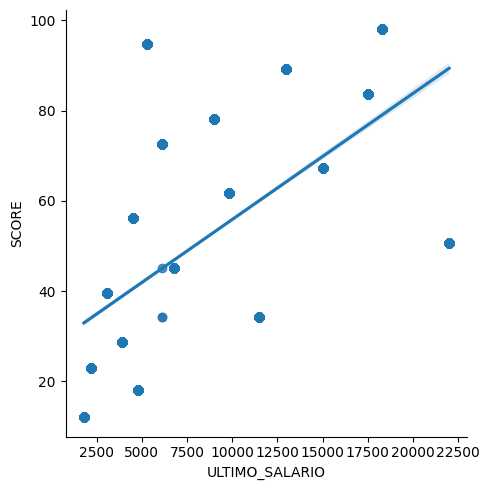

In [26]:
# Vamos observar um grafico de dispersão para avaliar a correlação de algumas variaveis
sns.lmplot(x = "ULTIMO_SALARIO", y = "SCORE", data = dados);

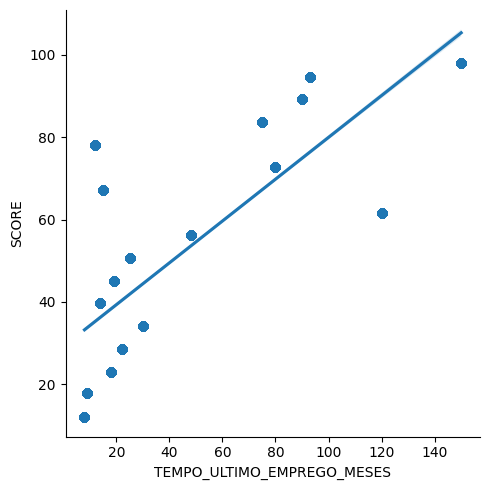

In [27]:
# Vamos observar um grafico de dispersão para avaliar a correlação de algumas variaveis
sns.lmplot(x = "TEMPO_ULTIMO_EMPREGO_MESES", y = "SCORE", data = dados);

In [28]:
# Vamos fazer uma engenharia de atributos no campo de IDADE e criar um novo campo de Faixa Etaria
print('Menor Idade: ', dados['IDADE'].min())
print('Maior Idade: ', dados['IDADE'].max())


Menor Idade:  19
Maior Idade:  65


In [29]:
# Engenharia de Atributos iremos criar uma nova variável
idade_bins = [0, 30, 40, 50, 60] # criando uma lista com as separações com 4 categorias
idade_categoria = ["Até 30", "31 a 40", "41 a 50", "Maior que 50"] # título das categorias
dados["FAIXA_ETARIA"] = pd.cut(dados["IDADE"], idade_bins, labels=idade_categoria) # criando nova coluna
dados["FAIXA_ETARIA"].value_counts() # incluindo nova coluna

FAIXA_ETARIA
Até 30          3552
Maior que 50    2448
41 a 50         2070
31 a 40         1270
Name: count, dtype: int64

In [30]:
# Criando lista das variáveis categóricas
variaveis_categoricas = []
for i in dados.columns[0:48].tolist():
        if dados.dtypes[i] == 'object' or dados.dtypes[i] == 'category':
            print(i, ':' , dados.dtypes[i])
            variaveis_categoricas.append(i)

UF : object
ESCOLARIDADE : object
ESTADO_CIVIL : object
CASA_PROPRIA : object
OUTRA_RENDA : object
TRABALHANDO_ATUALMENTE : object
FAIXA_ETARIA : category


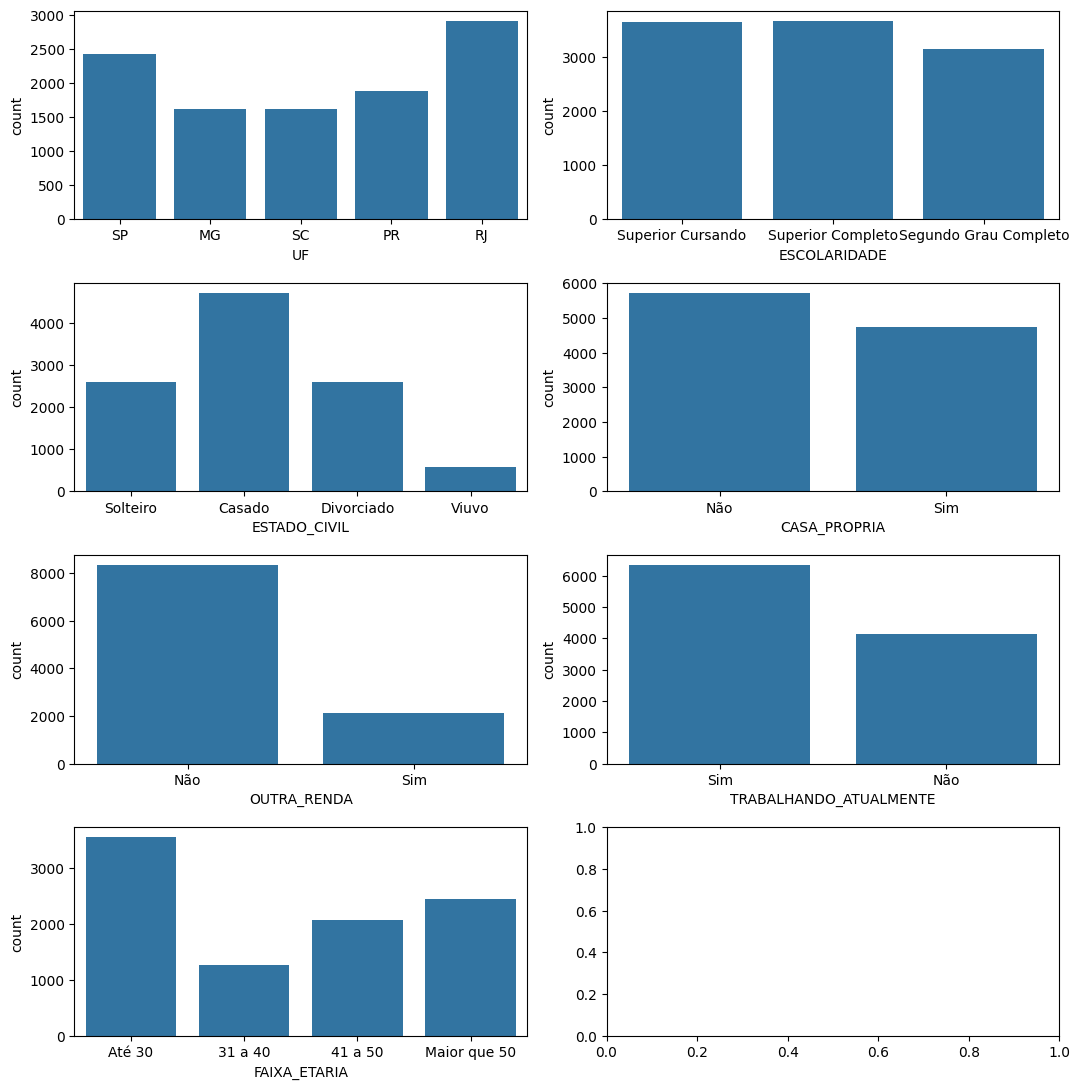

In [33]:
plt.rcParams["figure.figsize"] = [11.00, 11.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(4, 2) #4 linhas e 2 colunas

linha = 0
coluna = 0

for i in variaveis_categoricas:
    sns.countplot(data = dados, x=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

In [34]:
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string para transformar para variáveis numéricas
dados['FAIXA_ETARIA'] = lb.fit_transform(dados['FAIXA_ETARIA'])
dados['OUTRA_RENDA'] = lb.fit_transform(dados['OUTRA_RENDA'])
dados['TRABALHANDO_ATUALMENTE'] = lb.fit_transform(dados['TRABALHANDO_ATUALMENTE'])
dados['ESTADO_CIVIL'] = lb.fit_transform(dados['ESTADO_CIVIL'])
dados['CASA_PROPRIA'] = lb.fit_transform(dados['CASA_PROPRIA'])
dados['ESCOLARIDADE'] = lb.fit_transform(dados['ESCOLARIDADE'])
dados['UF'] = lb.fit_transform(dados['UF'])

# Remove valores missing eventualmente gerados
dados.dropna(inplace = True) # comando para excluir algum suposto valor nulo que venha a ser gerado

In [35]:
# Observando as transformações
dados.head(5)

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE,FAIXA_ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,12.000000,2
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,18.000000,2
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,23.000000,2
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.0,0,0,28.666667,2
4,2,28,1,1,2,0,1,370000,0,0,30,1,6100.0,1,35000,34.166667,2


In [36]:
# Agora podemos observar que já temos todas variaveis numericas
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10474 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10474 non-null  int64  
 1   IDADE                       10474 non-null  int64  
 2   ESCOLARIDADE                10474 non-null  int64  
 3   ESTADO_CIVIL                10474 non-null  int64  
 4   QT_FILHOS                   10474 non-null  int64  
 5   CASA_PROPRIA                10474 non-null  int64  
 6   QT_IMOVEIS                  10474 non-null  int64  
 7   VL_IMOVEIS                  10474 non-null  int64  
 8   OUTRA_RENDA                 10474 non-null  int64  
 9   OUTRA_RENDA_VALOR           10474 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10474 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10474 non-null  int64  
 12  ULTIMO_SALARIO              10474 non-null  float64
 13  QT_CARROS                   10474 no

In [37]:
# Separando a variavel alvo no caso a score
target = dados.iloc[:,15:16] # vamos pegar todas as linhas: da coluna 15 até a 16

In [38]:
# Separando as variaveis preditoras
preditoras = dados.copy() #Fazendo uma cópia do dataframe
del preditoras['SCORE'] #Excluindo a variavel target, pois já separamos ela na etapa anterior
preditoras.head()#Visualizando as variaveis preditoras

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,FAIXA_ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,2
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,2
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,2
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.0,0,0,2
4,2,28,1,1,2,0,1,370000,0,0,30,1,6100.0,1,35000,2


In [39]:
# Divisão em dados de treino e teste. 70% para treino e 30% para teste
x_treino, x_teste, y_treino, y_teste = train_test_split(preditoras, target, test_size = 0.3, random_state = 40)

In [40]:
# Vamos aplicar a normalização em treino e teste para deixar na mesma escala 0 e 1
sc = MinMaxScaler()
x_treino_normalizados = sc.fit_transform(x_treino)
x_teste_normalizados = sc.transform(x_teste)

In [41]:
# Iniciando o treinamento
modelo = LinearRegression()
modelo = modelo.fit(x_treino_normalizados, y_treino)

In [42]:
# Observando a acurácia
r2_score(y_teste, modelo.fit(x_treino_normalizados, y_treino).predict(x_teste_normalizados))

0.7984013631162861

In [43]:
# Testando
UF = 2
IDADE = 42
ESCOLARIDADE = 1
ESTADO_CIVIL = 2
QT_FILHOS = 1
CASA_PROPRIA = 1
QT_IMOVEIS = 1
VL_IMOVEIS = 300000
OUTRA_RENDA = 1
OUTRA_RENDA_VALOR = 2000
TEMPO_ULTIMO_EMPREGO_MESES = 18
TRABALHANDO_ATUALMENTE = 1
ULTIMO_SALARIO = 5400.0
QT_CARROS = 2
VALOR_TABELA_CARROS = 70000
FAIXA_ETARIA = 3

novos_dados = [UF, IDADE, ESCOLARIDADE, ESTADO_CIVIL, QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,
               OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,
               VALOR_TABELA_CARROS, FAIXA_ETARIA]


# Reshape
X = np.array(novos_dados).reshape(1, -1)
X = sc.transform(X)

# Previsão
print("Score de crédito previsto para esse cliente:", modelo.predict(X))

Score de crédito previsto para esse cliente: [[18.31962703]]


In [44]:
# Testando novamente
UF = 1
IDADE = 50
ESCOLARIDADE = 2
ESTADO_CIVIL = 2
QT_FILHOS = 3
CASA_PROPRIA = 3
QT_IMOVEIS = 3
VL_IMOVEIS = 500000
OUTRA_RENDA = 1
OUTRA_RENDA_VALOR = 3000
TEMPO_ULTIMO_EMPREGO_MESES = 18
TRABALHANDO_ATUALMENTE = 1
ULTIMO_SALARIO = 10400.0
QT_CARROS = 2
VALOR_TABELA_CARROS = 90000
FAIXA_ETARIA = 3

novos_dados = [UF, IDADE, ESCOLARIDADE, ESTADO_CIVIL, QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,
               OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,
               VALOR_TABELA_CARROS, FAIXA_ETARIA]


# Reshape
X = np.array(novos_dados).reshape(1, -1)
X = sc.transform(X)

# Previsão
print("Score de crédito previsto para esse cliente:", modelo.predict(X))

Score de crédito previsto para esse cliente: [[57.46157269]]
